In [ ]:
"""Primeiro algoritmo quântico que performou melhor que o melhor algoritmo clássico

O problema consiste em uma função Booleana

            f({x_0, x_1, ...}) -> 0 or 1, onde x_n é 0 ou 1
            
Essa função ou é constante (resulta em todos os outputs como 0 ou 1) ou
ela é função balanceada (resulta em metade dos outputs como 0 e a outra metade como 1)

O desafio é determinar se a função dada é balanceada ou constante.
"""
    
    
"""Classicamente:
        Se soubermos que f(0,0,0,...) -> 0 e f(1,0,0,...) -> 1 então a f é balanceada
        
        Mas se a saída da função for 0 para várias combinações de bits,
        teremos que testar metade dos bits mais um para ter certeza de que ela é constante,
        uma vez que se tivermos 6 possíveis inputs e os (3+1) primeiros inputs resultarem o mesmo output,
        é certo que f não é balanceada.
        
        De modo geral, se tivermos n bits, teremos 2**n inputs e portanto temos que testar a função
        para 2**(n-1) + 1 no pior cenário, ou seja, aquele em que a função f retorna o mesmo valor
        para todos esses inputs.
        
        A prob de f ser constante depois de k inputs é 1 - (1 / 2**(k-1)) para 1 < k <= 2**(n-1),
        portanto daria para ter uma confiança de que f é constante depois de chamar a função algumas vezes
        menos do que 2**(n-1) + 1.
        
    QUANTICAMENTE:
        Usando computação quântica, podemos resolver esse problema com 100% de certeza com apenas uma
        chamada da função f!
"""

In [1]:
import qiskit as q
from qiskit.visualization import matplotlib, plot_histogram, plot_bloch_multivector
from matplotlib import style
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
style.use("dark_background")

statevec_sim = q.Aer.get_backend("statevector_simulator")
counts_sim = q.Aer.get_backend('qasm_simulator')

# Uncertain (superpositioned qbits) qbits

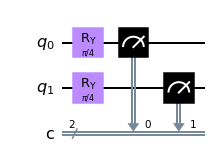

In [2]:
c = q.QuantumCircuit(2,2)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector(c)
c.measure([0,1], [0,1])

c.draw(output="mpl")

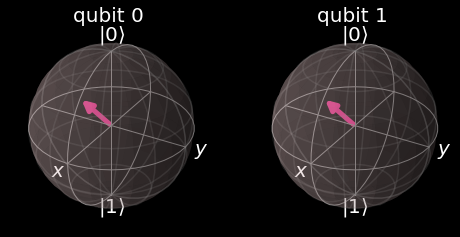

In [3]:
plot_bloch_multivector(orig_statevec)

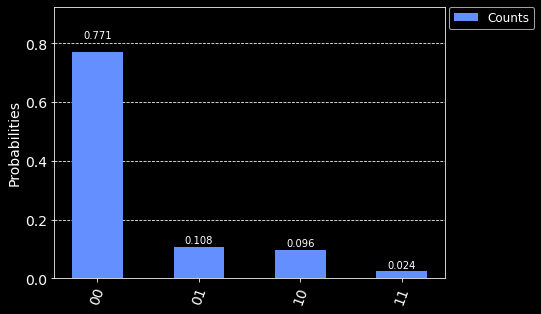

In [4]:
orig_counts = q.execute(c, backend=counts_sim, shots=1024).result().get_counts(c)
plot_histogram([orig_counts], legend=['Counts'])

# Uncertain qbits + Hadamard

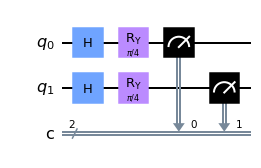

In [5]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector(c)
c.measure([0,1], [0,1])

c.draw(output="mpl")

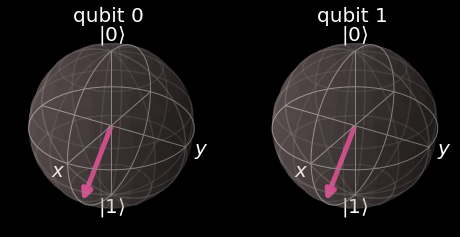

In [6]:
plot_bloch_multivector(statevec)

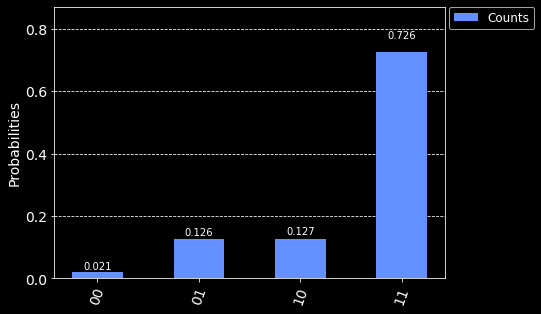

In [8]:
counts = q.execute(c, backend=counts_sim, shots=50000).result().get_counts(c)
plot_histogram([counts], legend=['Counts'])

# Hadamard + Uncertain qbits + Hadamard

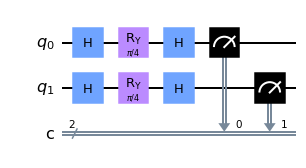

In [9]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector(c)
c.measure([0,1], [0,1])

c.draw(output="mpl")

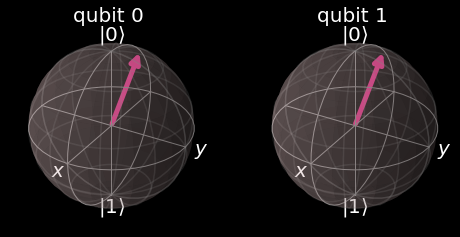

In [10]:
plot_bloch_multivector(statevec)

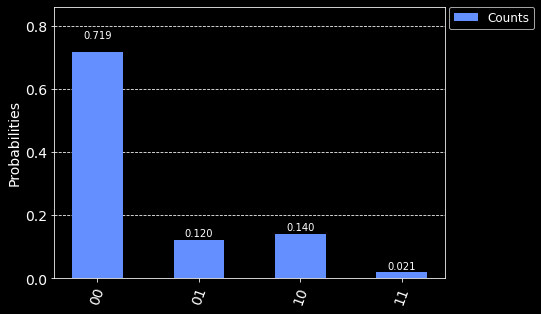

In [11]:
counts = q.execute(c, backend=counts_sim, shots=1024).result().get_counts(c)
plot_histogram([counts], legend=['Counts'])

# Certain qbits (not superpositioned)

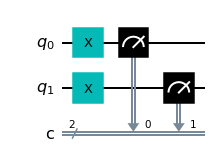

In [12]:
c = q.QuantumCircuit(2,2)

c.x(0)
c.x(1)

statevec = q.execute(c, backend=statevec_sim).result().get_statevector(c)
c.measure([0,1], [0,1])

c.draw(output="mpl")

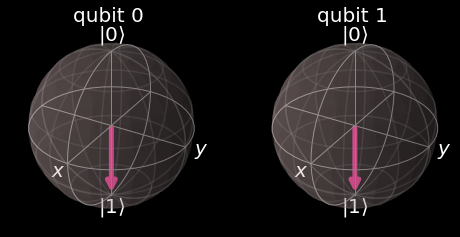

In [13]:
plot_bloch_multivector(statevec)

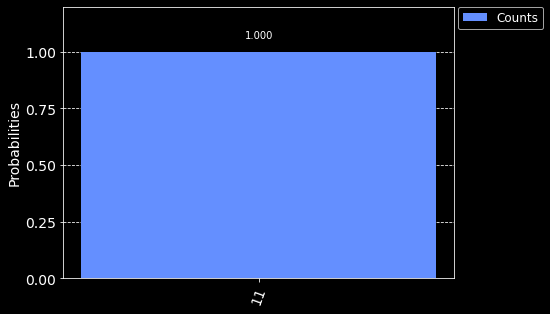

In [14]:
orig_counts = q.execute(c, backend=counts_sim, shots=1024).result().get_counts(c)
plot_histogram([orig_counts], legend=['Counts'])

# Hadamard + certain qbits

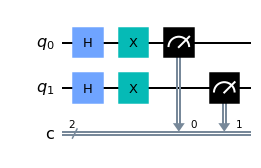

In [15]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)

statevec = q.execute(c, backend=statevec_sim).result().get_statevector(c)
c.measure([0,1], [0,1])

c.draw(output="mpl")

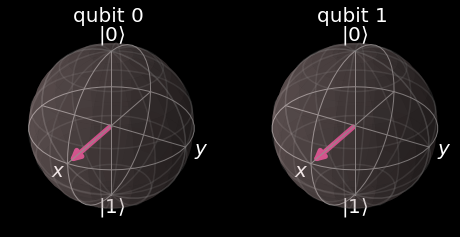

In [16]:
plot_bloch_multivector(statevec)

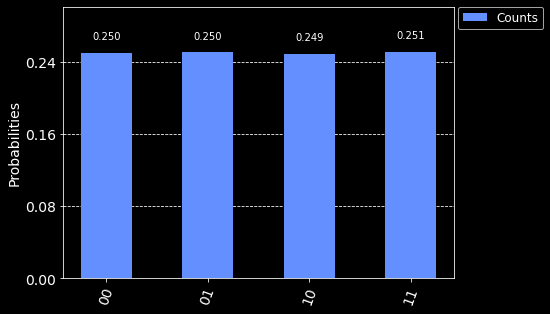

In [17]:
counts = q.execute(c, backend=counts_sim, shots=100000).result().get_counts(c)
plot_histogram([counts], legend=['Counts'])

# Hadamard + Certain qbits + Hadamard

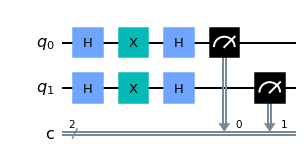

In [18]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector(c)
c.measure([0,1], [0,1])

c.draw(output="mpl")

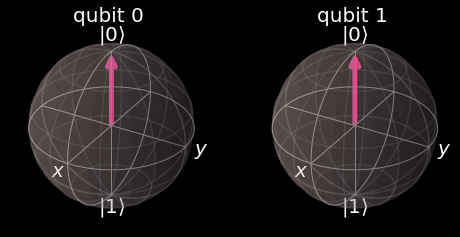

In [19]:
plot_bloch_multivector(statevec)

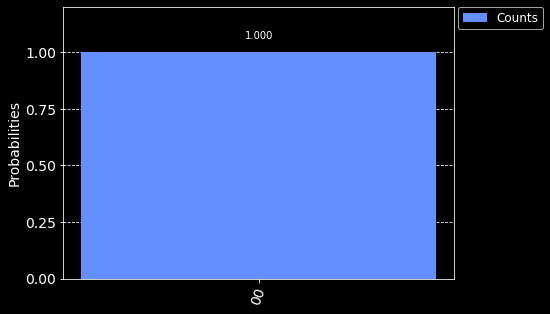

In [20]:
counts = q.execute(c, backend=counts_sim, shots=100000).result().get_counts(c)
plot_histogram([counts], legend=['Counts'])

In [21]:
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c

def constant_black_box(c):
    return c

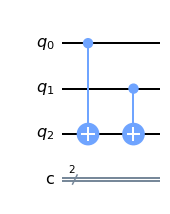

In [22]:
c = q.QuantumCircuit(3,2)
c = balanced_black_box(c)
c.draw(output="mpl")

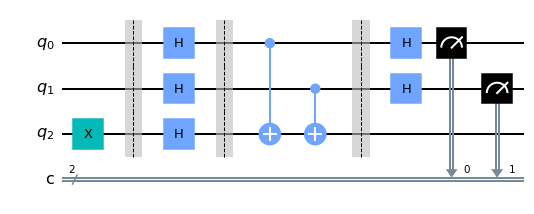

In [32]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier() 
c.h(0)
c.h(1)
c.h(2)
c.barrier() 
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw(output="mpl")

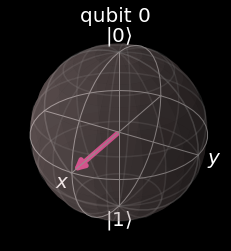

In [31]:
# A MÁGICA ACONTECE AQUI

#c = q.QuantumCircuit(1,1)
##c.x(0)
#c.h(0)
#c.x(0)
#statevec = q.execute(c, backend=statevec_sim).result().get_statevector(c)
#plot_bloch_multivector(statevec)

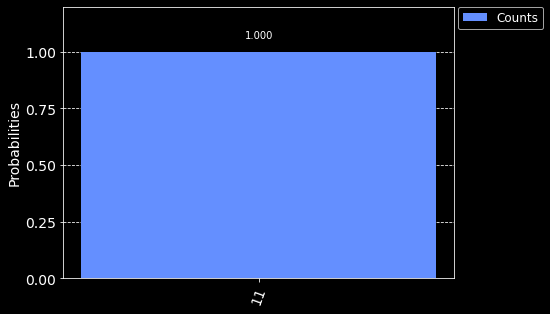

In [33]:
counts = q.execute(c, backend=counts_sim, shots=100000).result().get_counts(c)
plot_histogram([counts], legend=['Counts'])

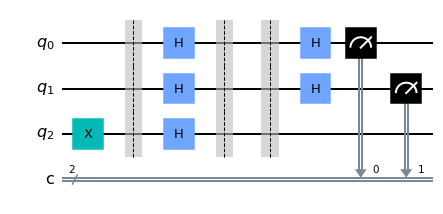

In [34]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier() 
c.h(0)
c.h(1)
c.h(2)
c.barrier() 
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw(output="mpl")

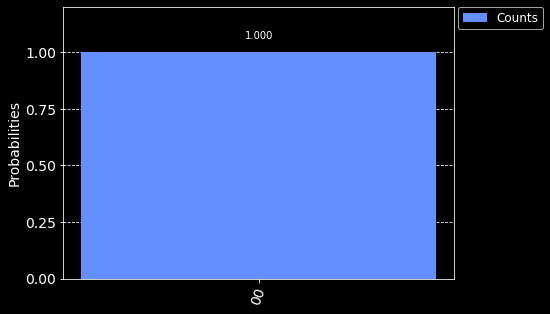

In [35]:
counts = q.execute(c, backend=counts_sim, shots=100000).result().get_counts(c)
plot_histogram([counts], legend=['Counts'])